In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
Survey= pd.read_csv('survey lung cancer.csv')

In [4]:
#In this survey data, 2= Yes, 1=No like in the smoking column 2 means smokers and 1 means non-smokers

Survey

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [5]:
Survey.shape

(309, 16)

In [6]:
Survey.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [7]:
#No null values are there
Survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='AGE', ylabel='Density'>

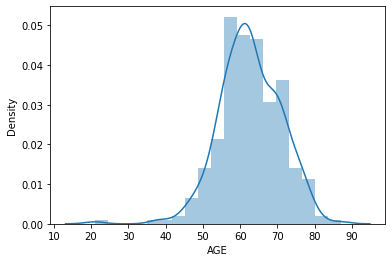

In [8]:


sns.distplot(Survey["AGE"])

(array([ 1.,  0.,  2.,  7., 21., 92., 97., 59., 27.,  3.]),
 array([21. , 27.6, 34.2, 40.8, 47.4, 54. , 60.6, 67.2, 73.8, 80.4, 87. ]),
 <BarContainer object of 10 artists>)

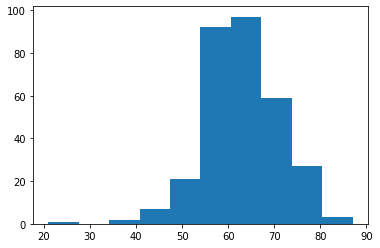

In [45]:
plt.hist(Survey["AGE"])

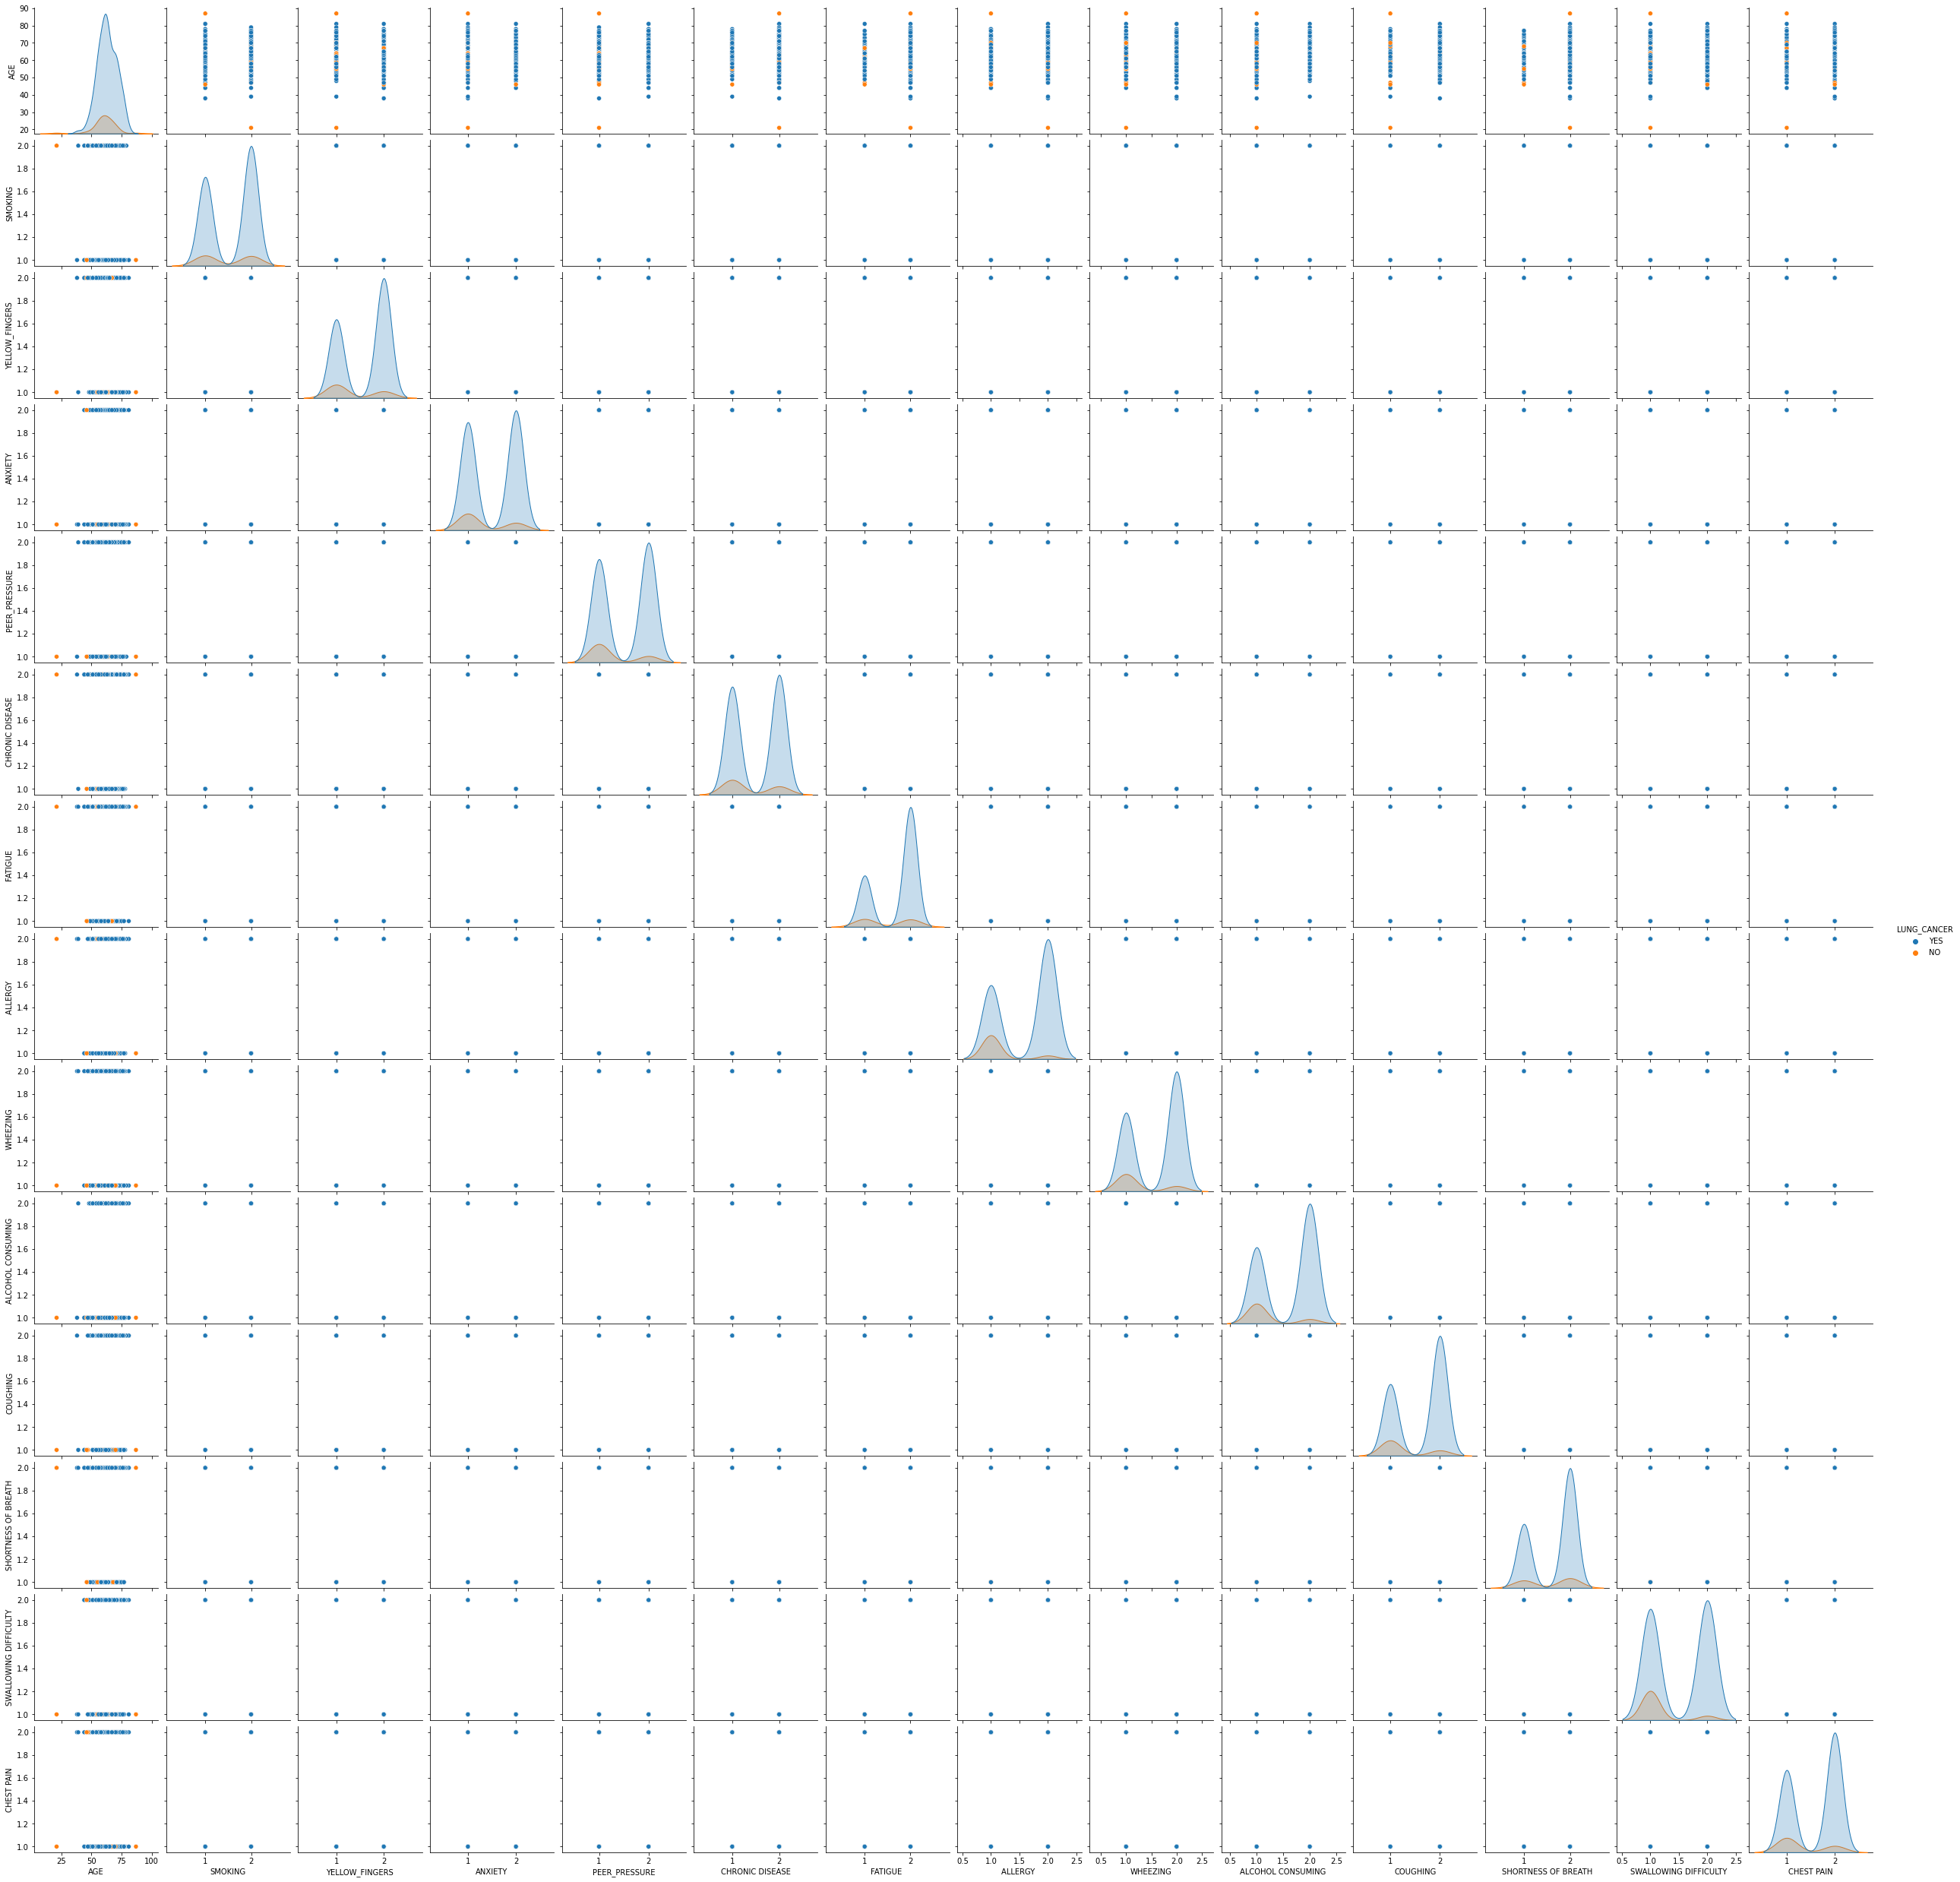

In [46]:
sns.pairplot(Survey, hue='LUNG_CANCER')

In [9]:
#Out of 309 entries, 270 cases are showing positive lung cancer detection.

#Occurence=Survey.loc[Survey['LUNG_CANCER']=='YES']
#Occurence.count()

In [10]:
#Factors which are associated for causing lung cancer.

Factors= Survey.drop(columns= ['AGE','YELLOW_FINGERS', 'ANXIETY','FATIGUE ', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN'])

In [153]:
Factors

,GENDER,SMOKING,PEER_PRESSURE,CHRONIC DISEASE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,LUNG_CANCER
0,M,1,1,1,1,2,2,YES
1,M,2,1,2,2,1,1,YES
2,F,1,2,1,1,2,1,NO
3,M,2,1,1,1,1,2,NO
4,F,1,1,1,1,2,1,NO
...,...,...,...,...,...,...,...,...
304,F,1,2,2,1,1,2,YES
305,M,2,1,1,2,2,2,YES
306,M,2,1,1,2,2,2,YES
307,M,2,1,1,2,1,2,YES


<Figure size 432x360 with 0 Axes>

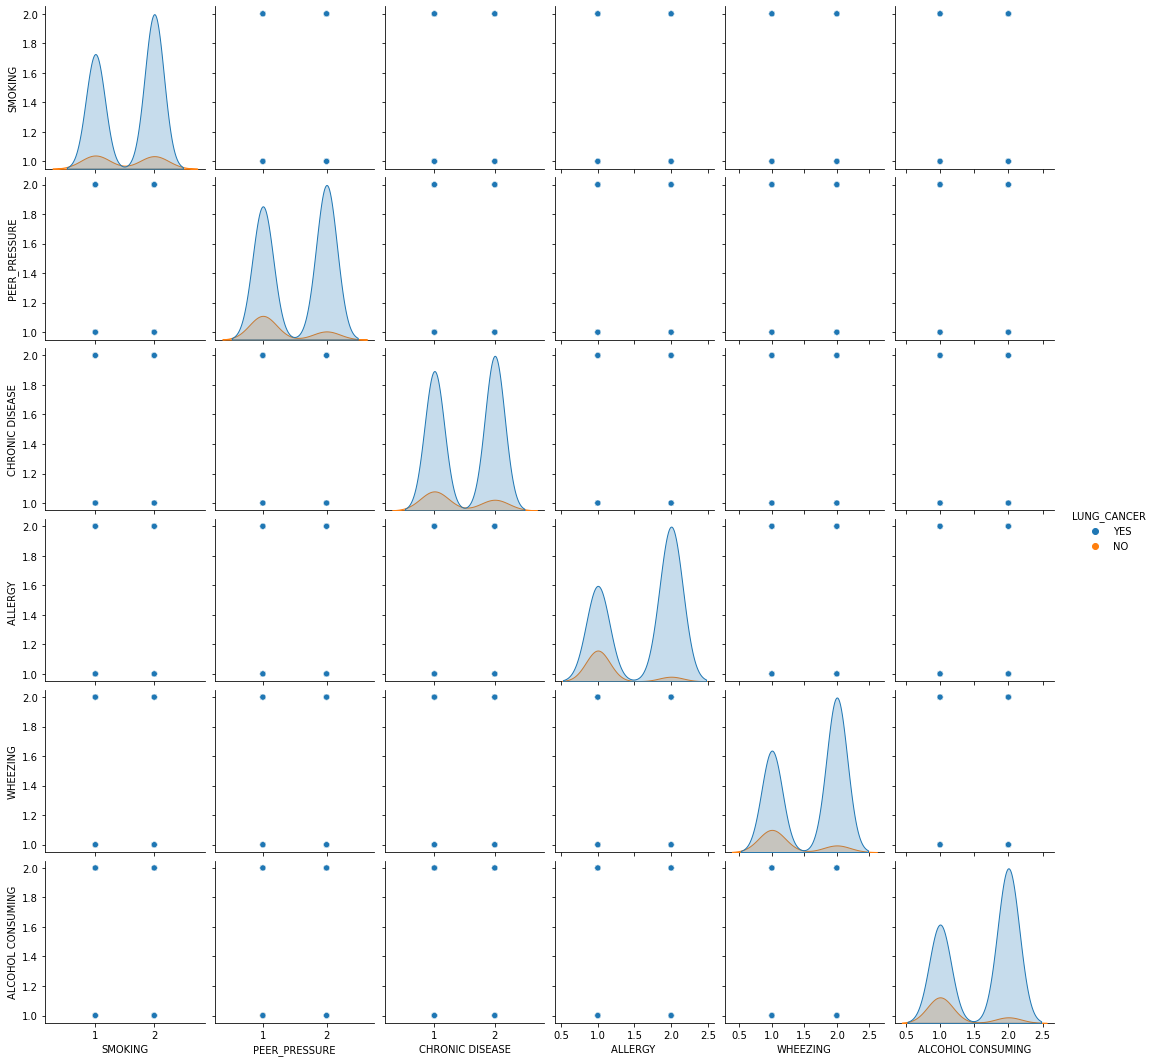

In [47]:
plt.figure(figsize=(6,5))

sns.pairplot(Factors,hue='LUNG_CANCER')

In [13]:
#There is no such correlation among all the factors. So we use the factors as the independent variables.

Factors.corr()

,SMOKING,PEER_PRESSURE,CHRONIC DISEASE,ALLERGY,WHEEZING,ALCOHOL CONSUMING
SMOKING,1.000000,-0.042822,-0.141522,0.001913,-0.129426,-0.050623
PEER_PRESSURE,-0.042822,1.000000,0.048515,-0.081800,-0.068771,-0.159973
CHRONIC DISEASE,-0.141522,0.048515,1.000000,0.106386,-0.049967,0.002150
ALLERGY,0.001913,-0.081800,0.106386,1.000000,0.173867,0.344339
WHEEZING,-0.129426,-0.068771,-0.049967,0.173867,1.000000,0.265659
ALCOHOL CONSUMING,-0.050623,-0.159973,0.002150,0.344339,0.265659,1.000000


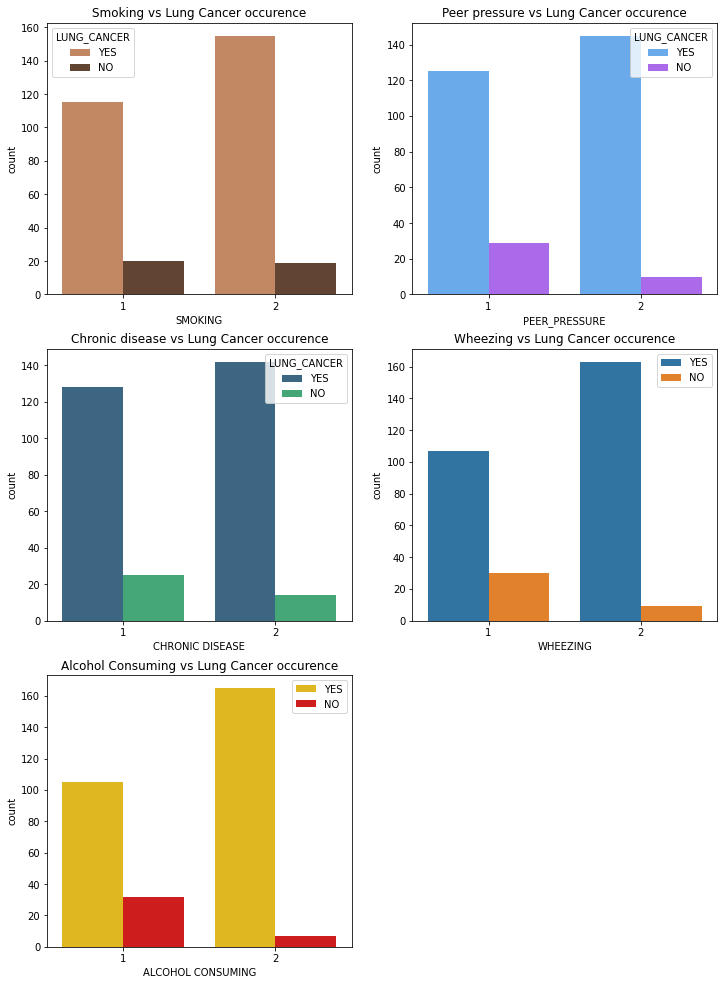

In [14]:
plt.figure(figsize=(12,17))
plt.subplot(3,2,1)
sns.countplot(x='SMOKING', hue='LUNG_CANCER', data= Factors, palette='copper_r')
plt.title('Smoking vs Lung Cancer occurence', fontsize=12)

plt.subplot(3,2,2)
sns.countplot(x='PEER_PRESSURE', hue='LUNG_CANCER', data= Factors, palette='cool')
plt.title('Peer pressure vs Lung Cancer occurence', fontsize=12)

plt.subplot(3,2,3)
sns.countplot(x='CHRONIC DISEASE', hue='LUNG_CANCER', data= Factors, palette='viridis')
plt.title('Chronic disease vs Lung Cancer occurence', fontsize=12)

plt.subplot(3,2,4)
sns.countplot(x='WHEEZING', hue='LUNG_CANCER', data= Factors)
plt.title('Wheezing vs Lung Cancer occurence', fontsize=12)
plt.legend(loc=1)

plt.subplot(3,2,5)
sns.countplot(x='ALCOHOL CONSUMING', hue='LUNG_CANCER', data= Factors, palette='hot_r')
plt.title('Alcohol Consuming vs Lung Cancer occurence', fontsize=12)
plt.legend(loc=1)

In [15]:
#Number of symptoms that might be related with lung cancer.

Symptoms= Survey.drop(columns= ['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY','PEER_PRESSURE', 'CHRONIC DISEASE', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING'])

In [16]:
Symptoms

,FATIGUE,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,2,2,2,2,2,YES
1,2,1,2,2,2,YES
2,2,2,2,1,2,NO
3,1,1,1,2,2,NO
4,1,2,2,1,1,NO
...,...,...,...,...,...,...
304,2,2,2,2,1,YES
305,2,2,2,1,2,YES
306,1,2,1,1,2,YES
307,2,2,2,1,2,YES


Text(0.5, 1.0, 'CHEST PAIN vs Lung Cancer occurence')

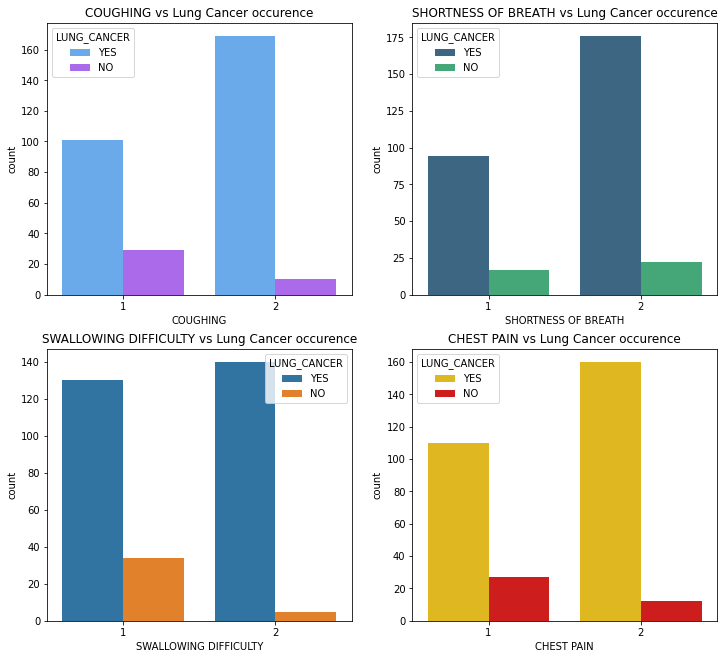

In [17]:
plt.figure(figsize=(12,17))
plt.subplot(3,2,1)
sns.countplot(x='COUGHING', hue='LUNG_CANCER', data= Symptoms, palette='cool')
plt.title('COUGHING vs Lung Cancer occurence', fontsize=12)

plt.subplot(3,2,2)
sns.countplot(x='SHORTNESS OF BREATH', hue='LUNG_CANCER', data= Symptoms, palette='viridis')
plt.title('SHORTNESS OF BREATH vs Lung Cancer occurence', fontsize=12)

plt.subplot(3,2,3)
sns.countplot(x='SWALLOWING DIFFICULTY', hue='LUNG_CANCER', data= Symptoms)
plt.title('SWALLOWING DIFFICULTY vs Lung Cancer occurence', fontsize=12)

plt.subplot(3,2,4)
sns.countplot(x='CHEST PAIN', hue='LUNG_CANCER', data= Symptoms, palette='hot_r')
plt.title('CHEST PAIN vs Lung Cancer occurence', fontsize=12)

# ML algorithm

## Logistic Regression using factors variable

###### Here, my main target is that to check the regression relationship for predicting occurence of lung cancer using different factors associated with it.
#So using the Lung cancer column as target variable and others feature present in factors column using as independent variables. 
#Making a model using Logistic Regression because our target variable present as binary catagorical value.

In [18]:
import sklearn

In [272]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
X= Factors.drop(columns=["GENDER", "LUNG_CANCER"])
Y= Factors["LUNG_CANCER"]

In [273]:
X

,SMOKING,PEER_PRESSURE,CHRONIC DISEASE,ALLERGY,WHEEZING,ALCOHOL CONSUMING
0,1,1,1,1,2,2
1,2,1,2,2,1,1
2,1,2,1,1,2,1
3,2,1,1,1,1,2
4,1,1,1,1,2,1
...,...,...,...,...,...,...
304,1,2,2,1,1,2
305,2,1,1,2,2,2
306,2,1,1,2,2,2
307,2,1,1,2,1,2


In [274]:
Y

0      YES
1      YES
2       NO
3       NO
4       NO
      ... 
304    YES
305    YES
306    YES
307    YES
308    YES
Name: LUNG_CANCER, Length: 309, dtype: object

In [275]:

for i in range (1,9):
    X= Factors.drop(columns=["GENDER", "LUNG_CANCER"])
    Y= Factors["LUNG_CANCER"]
    X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.30, random_state=i)
    Lr_factors1= LogisticRegression()
    Lr_factors1.fit(X_train, Y_train)
    factors_Pred1= Lr_factors1.predict(X_test)
    acuuracy_all= accuracy_score(Y_test, factors_Pred1)
    matrix_all_lr=confusion_matrix(Y_test, factors_Pred1)
    print(acuuracy_all)
    print(matrix_all_lr)

0.9032258064516129
[[ 3  6]
 [ 3 81]]
0.8279569892473119
[[ 0 15]
 [ 1 77]]
0.8817204301075269
[[ 2  9]
 [ 2 80]]
0.946236559139785
[[ 6  4]
 [ 1 82]]
0.9032258064516129
[[ 3  7]
 [ 2 81]]
0.946236559139785
[[ 6  4]
 [ 1 82]]
0.8817204301075269
[[ 5 11]
 [ 0 77]]
0.8494623655913979
[[ 3  8]
 [ 6 76]]


### Logistic algorithm provide good accuracy score when random_state=4

In [282]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.30, random_state=4)
LR_factor= LogisticRegression()
LR_factor.fit(X_train, Y_train)
LR_Pred= LR_factor.predict(X_test)
LR_acuuracy= accuracy_score(Y_test, LR_Pred)
LR_confusion_matrix=confusion_matrix(Y_test, LR_Pred)
LR_confusion_matrix

array([[ 6,  4],
       [ 1, 82]], dtype=int64)

In [283]:
LR_acuuracy

0.946236559139785

In [284]:
X_test

,SMOKING,PEER_PRESSURE,CHRONIC DISEASE,ALLERGY,WHEEZING,ALCOHOL CONSUMING
14,2,1,1,2,2,2
18,2,2,2,1,1,1
223,2,1,2,2,2,1
92,2,1,2,2,2,2
124,2,1,1,2,1,2
...,...,...,...,...,...,...
93,1,2,2,2,2,2
206,2,1,1,2,1,2
286,1,1,2,1,1,1
209,2,1,1,2,2,2


In [285]:
Y_test.values

array(['NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES',
       'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'NO', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES'],
      dtype=object)

In [286]:
LR_Pred

array(['YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES',
       'YES'], dtype=object)

In [287]:
LR_factor.predict([[2,2,2,1,1,1]])

array(['YES'], dtype=object)

In [288]:
Y_test[1]

'YES'

<function matplotlib.pyplot.show(close=None, block=None)>

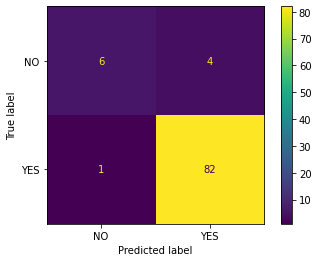

In [289]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(LR_factor,X_test,Y_test)
plt.show

In [290]:
LR_classification=classification_report(Y_test, LR_Pred)
LR_classification

'              precision    recall  f1-score   support\n\n          NO       0.86      0.60      0.71        10\n         YES       0.95      0.99      0.97        83\n\n    accuracy                           0.95        93\n   macro avg       0.91      0.79      0.84        93\nweighted avg       0.94      0.95      0.94        93\n'

### Naive Bayes Algorithm

In [75]:
from sklearn.naive_bayes import BernoulliNB

In [181]:
for i in range (1,9):
    X= Factors.drop(columns=["GENDER", "LUNG_CANCER"])
    Y= Factors["LUNG_CANCER"]
    X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.30, random_state=i)
    factorsNB_all= BernoulliNB()
    factorsNB_all.fit(X_train, Y_train)
    BernoulliNB_pred_all= factorsNB_all.predict(X_test)
    NB_accuracy_all=accuracy_score(Y_test, BernoulliNB_pred_all)
    matrix_all=confusion_matrix(Y_test, BernoulliNB_pred_all)
    print(NB_accuracy_all)
    print(matrix_all)

0.9032258064516129
[[ 0  9]
 [ 0 84]]
0.8387096774193549
[[ 0 15]
 [ 0 78]]
0.8817204301075269
[[ 0 11]
 [ 0 82]]
0.8924731182795699
[[ 0 10]
 [ 0 83]]
0.8924731182795699
[[ 0 10]
 [ 0 83]]
0.8924731182795699
[[ 0 10]
 [ 0 83]]
0.8279569892473119
[[ 0 16]
 [ 0 77]]
0.8817204301075269
[[ 0 11]
 [ 0 82]]


### Naive bayes algorithm provide good accuracy score when random_state=1, but for the comparison among the model take the same random_state value.

In [303]:
factorsNB_1= BernoulliNB()
factorsNB_1.fit(X_train, Y_train)
BernoulliNB_pred= factorsNB_1.predict(X_test)
NB_acuuracy= accuracy_score(Y_test, BernoulliNB_pred)
NB_confusion_matrix=confusion_matrix(Y_test, BernoulliNB_pred)
NB_confusion_matrix

array([[ 0, 10],
       [ 0, 83]], dtype=int64)

In [298]:
NB_acuuracy

0.8924731182795699

<function matplotlib.pyplot.show(close=None, block=None)>

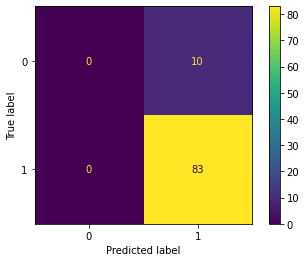

In [299]:
plot_confusion_matrix(factorsNB_1,X_test,Y_test)
plt.show

In [300]:
NB_classification=classification_report(Y_test, BernoulliNB_pred)
NB_classification

C:\Users\PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00        10\n           1       0.89      1.00      0.94        83\n\n    accuracy                           0.89        93\n   macro avg       0.45      0.50      0.47        93\nweighted avg       0.80      0.89      0.84        93\n'

### KNN Algorithm

In [208]:
from sklearn.preprocessing import LabelEncoder

In [292]:
Y1= LabelEncoder()
Y=Y1.fit_transform(Y)

In [293]:
Y

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [294]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.30, random_state=4)

In [295]:
Y_train

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [296]:
from sklearn.neighbors import KNeighborsClassifier

In [253]:
KNN=KNeighborsClassifier(3)
KNN.fit(X_train, Y_train)
KNN_pred= KNN.predict(X_test)

In [254]:
KNN_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1])

In [255]:
X_test

,SMOKING,PEER_PRESSURE,CHRONIC DISEASE,ALLERGY,WHEEZING,ALCOHOL CONSUMING
14,2,1,1,2,2,2
18,2,2,2,1,1,1
223,2,1,2,2,2,1
92,2,1,2,2,2,2
124,2,1,1,2,1,2
...,...,...,...,...,...,...
93,1,2,2,2,2,2
206,2,1,1,2,1,2
286,1,1,2,1,1,1
209,2,1,1,2,2,2


In [268]:
KNN.predict([[2,2,2,1,1,1]])

array([1])

In [269]:
Y_test

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1])

In [270]:
Y_test[1]

1

In [271]:
KNN_acuuracy= accuracy_score(Y_test, KNN_pred)
KNN_confusion_matrix=confusion_matrix(Y_test, KNN_pred)
KNN_acuuracy

0.9247311827956989

In [260]:
KNN_confusion_matrix

array([[ 6,  4],
       [ 3, 80]], dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

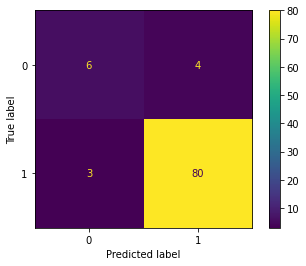

In [261]:
plot_confusion_matrix(KNN, X_test, Y_test)
plt.show

Text(0, 0.5, 'Accuracy scores')

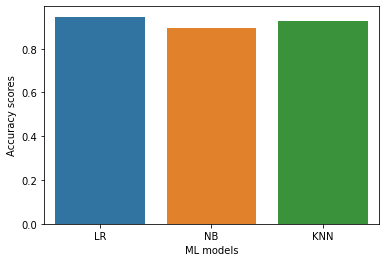

In [301]:
sns.barplot(x= ['LR','NB','KNN'], y=[0.946236559139785, 0.8924731182795699,0.9247311827956989])
plt.xlabel('ML models')
plt.ylabel('Accuracy scores')

## Conclusion

### According to the analysis of this particular dataset,Logistic regression provide the best result instead of naive bayes and KNN model 